#### - Lakshay , Utkarsh , Shikha , Khyati 
#### - Nsut 2025 Machine Learning Lab Project 

In [1]:
pip install tensorflow keras sklearn matplotlib pandas pillow opencv-python

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
#importing required modules to create this project.
import numpy as np  #basic exploration and assist.
import pandas as pd #basic exploration and assist.
import matplotlib.pyplot as plt #to plot graphs.
import cv2 #to classify image and assist recognition.
import tensorflow as tf
from PIL import Image #to create image arrays etc.
import os #to allow operating system calls.
from sklearn.model_selection import train_test_split #scikit learn to split, test and train the data.
from tensorflow.keras.utils import to_categorical #to encode data to categories.
from keras.models import Sequential, load_model #to create our model which is sequential.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout #to add layers to our model for accurate results.

##### dataset exploration

In [3]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#retrieving the images and their labels and appending said items in previously initialised lists.
for i in range(classes):
    path = os.path.join(cur_path,'../archive/Train/',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [5]:
#converting lists into numpy arrays to feed model.
data = np.array(data)
labels = np.array(labels)
# data array is a 4d array : with given dimensions : where : each dimension tells the 
# count of the images , size of each image and corresponding to each of R G B : 30 * 30 ki grids will
# exist for each image !!

#labels are 1d array !!
print(data.shape, labels.shape) #The shape of data obtained is (39209, 30, 30, 3) which means that there are 39,209 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value)

(39209, 30, 30, 3) (39209,)


In [6]:
#splitting training and testing dataset

# 80% training data and 20% test data !!
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#converting the labels into one-hot encoding of categories.

# y_train = to_categorical(y_train, 43)
# y_test = to_categorical(y_test, 43)

##### building CNN model

In [9]:
#building the CNN model as CNN is best for image classification purposes.
model = Sequential()
# we pass this input_shape only in 1st layer bcz it is a variable that is getting associated with this 
# model object and thereby used by the subsequent layers !! 
#initially when undefined: it is associated with that model instance !!
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) #2D convolution layer class that creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2))) #max pooling operation for 2D spatial data.
model.add(Dropout(rate=0.25)) #applies dropout layer that randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

# Larger kernal size req for generalized features extraction : for detailed feature extraction 
# more smaller sized kernals are required !!

# initial cnn layers are used to extract generalized features and more detailed features are 
# extracted using these filter layers !!!

# all these 64 filters are fitted parallelly and are used to identify diff diff features !!
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# These dropout basically : deactivates atleast 25% of the neurons to reduce overfitting while training of data 
# this is done bcz : we want our some of the neurons whom we give more weightage to not be over trained by
# noise present in the data !!
model.add(Dropout(rate=0.25))
model.add(Flatten()) #flattens the input without affecting the batch size.
model.add(Dense(256, activation='relu')) #regular densely-connected NN layer.
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

##### training and validation of model

In [10]:
#compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#we compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.
epochs = 15 #we tried with batch size 32 and 64. our model performed better with 64 batch size and after 15 epochs the accuracy was stable.
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 60s 60ms/step - loss: 1.9947 - accuracy: 0.4889 - val_loss: 0.5264 - val_accuracy: 0.8736
Epoch 2/15
981/981 [==============================] - 59s 60ms/step - loss: 0.7510 - accuracy: 0.7830 - val_loss: 0.2266 - val_accuracy: 0.9429
Epoch 3/15
981/981 [==============================] - 59s 60ms/step - loss: 0.4965 - accuracy: 0.8580 - val_loss: 0.1229 - val_accuracy: 0.9703
Epoch 4/15
981/981 [==============================] - 58s 59ms/step - loss: 0.3719 - accuracy: 0.8932 - val_loss: 0.1980 - val_accuracy: 0.9481
Epoch 5/15
981/981 [==============================] - 57s 58ms/step - loss: 0.3174 - accuracy: 0.9114 - val_loss: 0.0749 - val_accuracy: 0.9784
Epoch 6/15
981/981 [==============================] - 58s 60ms/step - loss: 0.2637 - accuracy: 0.9239 - val_loss: 0.0696 - val_accuracy: 0.9824
Epoch 7/15
981/981 [==============================] - 58s 59ms/step - loss: 0.2864 - accuracy: 0.9216 - val_loss: 0.0729 - val_accuracy:

C:\Users\91931\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


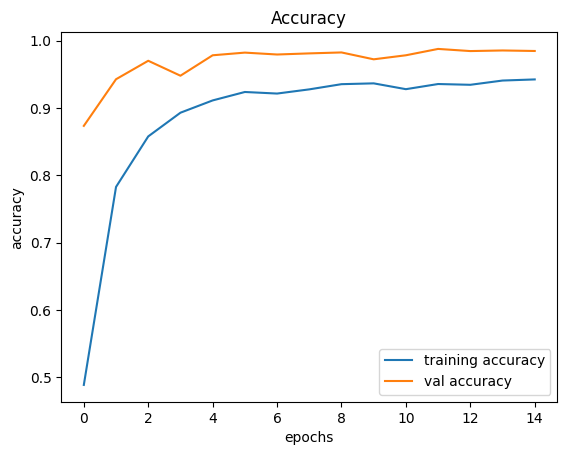

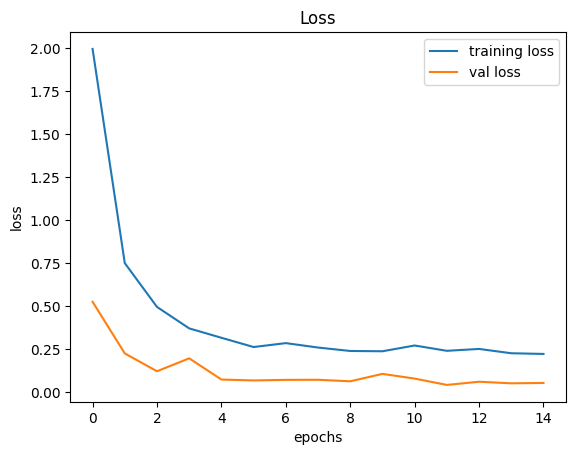

In [11]:
#with matplotlib, we plot the graph for accuracy and the loss.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##### teting model with test dataset

In [12]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('../archive/Test.csv')
labels = y_test["ClassId"].values
imgs = "../archive/" + y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# it contains for each test data the probability of each class !
predict_x=model.predict(X_test) 
# Find the predicted class (the one with the highest probability) for each test image
classes_x=np.argmax(predict_x,axis=1)

395/395 [==============================] - 3s 8ms/step


In [13]:
#accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x)) #our model got a 95% accuracy.
model.save('traffic_classifier.h5')

0.9611243072050673


C:\Users\91931\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
#imported required files for GUI. we are using tkinter as our core for the GUI.
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [16]:
#loading the trained model to classify sign via keras.
from keras.models import load_model
model = load_model('traffic_classifier.h5')

In [17]:
#creating dictionary to label all traffic sign classes.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

##### Run this kernel to execute program model

In [18]:
#initialising the GUI (creating windows, buttons and functions).
#creating GUI main window first.
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic Sign Classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
#classify function to predict and classify the uploaded test image to give output.
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    predict_classes = model.predict([image])[0] 
    pred = np.argmax(predict_classes)
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='black', text=sign) 
#creating classify button ui that gives output on click.
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='Red', foreground='black',font=('arial',14,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
#uplaod function that lets test image from local device to be uploaded for classification.
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/0.1),(top.winfo_height()/0.1)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
#upload button ui created that lets us upload test image for classification on click.
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='Red', foreground='black',font=('arial',14,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
#heading and loops
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='black')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 69ms/step
Speed limit (50km/h)
1/1 [==============================] - 0s 19ms/step
Priority road
1/1 [==============================] - 0s 17ms/step
Speed limit (30km/h)
1/1 [==============================] - 0s 18ms/step
Keep right
